In [96]:
import numpy as np

In [97]:
from scipy.special import gamma

n_star = np.linspace(0,1,100_001)

def func_trans(n_star,alpha,p):
    """left-hand side of transcendental equation defined as a numpy array"""
    return (gamma(n_star+alpha)*gamma(2*alpha))/(gamma(n_star+2*alpha)*gamma(alpha))-1/(1+p)

In [98]:
def find_df(alpha,p):
    """root finding by minimizing the cost function: square of left-hanad side"""
    cost_array = func_trans(n_star,alpha,p)**2
    min_index = np.argmin(cost_array)
    df_value = n_star[min_index]
    df_rounded = float("{:.6f}".format(df_value))
    return df_rounded

In [99]:
def plot_data(alpha):
    p_array = np.linspace(0,1,1_000)
    df_array = []
    for i in p_array:
        df_value = find_df(alpha,i)
        df_array.append(df_value)
    return p_array, np.array(df_array)

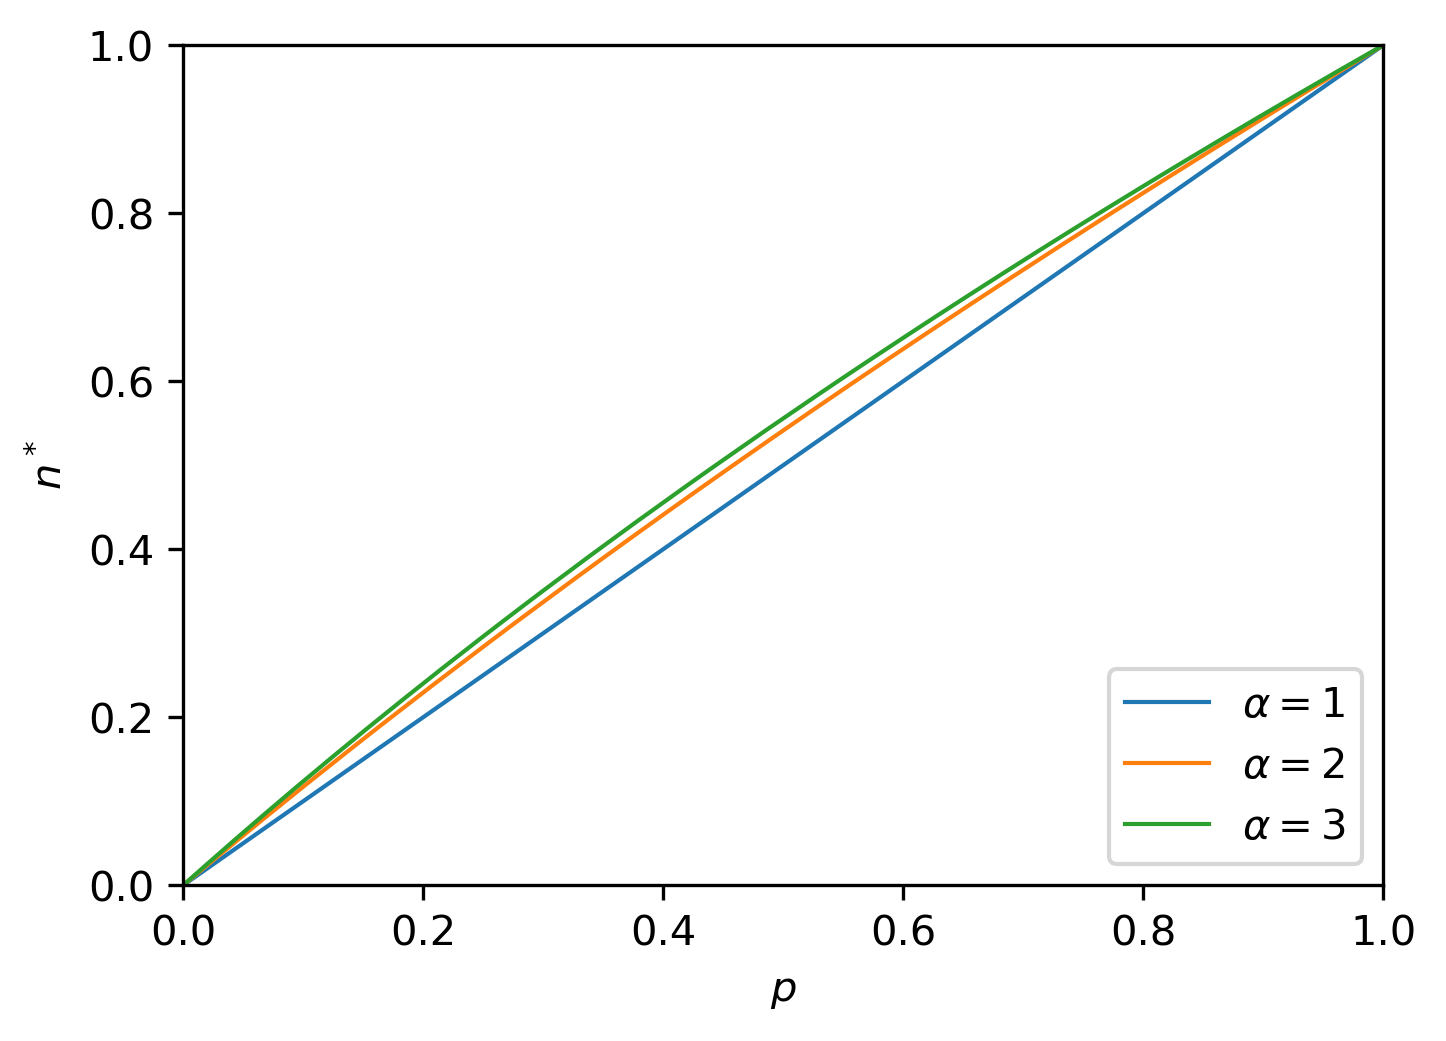

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
alpha_values = [1, 2, 3]

for alpha in alpha_values:
    x, y = plot_data(alpha)
    plt.plot(x, y, label=r"$\alpha={:.0f}$".format(alpha), linewidth=1)
    pass

plt.legend(loc=4)
plt.xlabel(r"$p$")
plt.ylabel(r"$n^*$")
plt.xlim([0, 1])
plt.ylim([0, 1])
ax.set_position([0.15, 0.15, 0.8, 0.8])
plt.savefig("df_plot-fixed_alpha.pdf")